In [1]:
# Importing all the necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path

plt.style.use('dark_background')

In [2]:
base_path=Path.cwd().parent
csv_path=base_path/"data"/"processed"/"parameters.csv"
print(csv_path)

c:\Users\khadk\OneDrive\Desktop\phylogenetics\data\processed\parameters.csv


In [3]:
trees=pd.read_csv(csv_path)
trees.shape

(100, 7)

In [4]:
trees.head()

,file_id,t1,la1,mu_over_la1,psi,la2_multiplier,n_tips
0,4,20.966507,0.043719,0.510420,0.422254,4.203602,852
1,8,12.943625,0.941442,0.601022,0.513960,4.276491,778
2,9,16.995269,0.453313,0.542000,0.800224,2.065512,485
3,6,92.395870,0.144131,0.395380,0.195977,2.590912,120
4,3,22.987605,0.791445,0.528616,0.859941,2.538150,585


In [5]:
trees.isnull().mean()*100

file_id           0.0
t1                0.0
la1               0.0
mu_over_la1       0.0
psi               0.0
la2_multiplier    0.0
n_tips            0.0
dtype: float64

In [6]:
trees.duplicated().sum()

np.int64(0)

In [7]:
trees.describe().T

,count,mean,std,min,25%,50%,75%,max
file_id,100.0,49.500000,29.011492,0.000000,24.750000,49.500000,74.250000,99.000000
t1,100.0,45.245990,27.766758,10.098090,21.141387,38.659662,66.167551,117.903988
la1,100.0,0.317283,0.264515,0.010706,0.111429,0.240658,0.462929,0.998685
mu_over_la1,100.0,0.558658,0.236261,0.002906,0.391837,0.575657,0.761178,0.895249
psi,100.0,0.569511,0.254854,0.111606,0.364000,0.630916,0.754533,0.997457
la2_multiplier,100.0,3.332970,0.870576,2.018186,2.572421,3.282546,4.016087,4.999711
n_tips,100.0,517.870000,256.714110,120.000000,304.500000,501.500000,742.500000,981.000000


In [8]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_id         100 non-null    int64  
 1   t1              100 non-null    float64
 2   la1             100 non-null    float64
 3   mu_over_la1     100 non-null    float64
 4   psi             100 non-null    float64
 5   la2_multiplier  100 non-null    float64
 6   n_tips          100 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 5.6 KB


In [9]:
def plot_kde(df:pd.DataFrame,cols:str):
    fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(12,6))
    axes=axes.flatten()
    for index,col in enumerate(cols):
        if index<len(axes):
            sns.kdeplot(df[col],fill=True,color='purple',ax=axes[index])
            axes[index].set_title(f'KDE of {col}')
    plt.tight_layout()
    plt.show()

In [10]:
num_cols=[col for col in trees.columns if col!='tree_id']
num_cols

['file_id', 't1', 'la1', 'mu_over_la1', 'psi', 'la2_multiplier', 'n_tips']

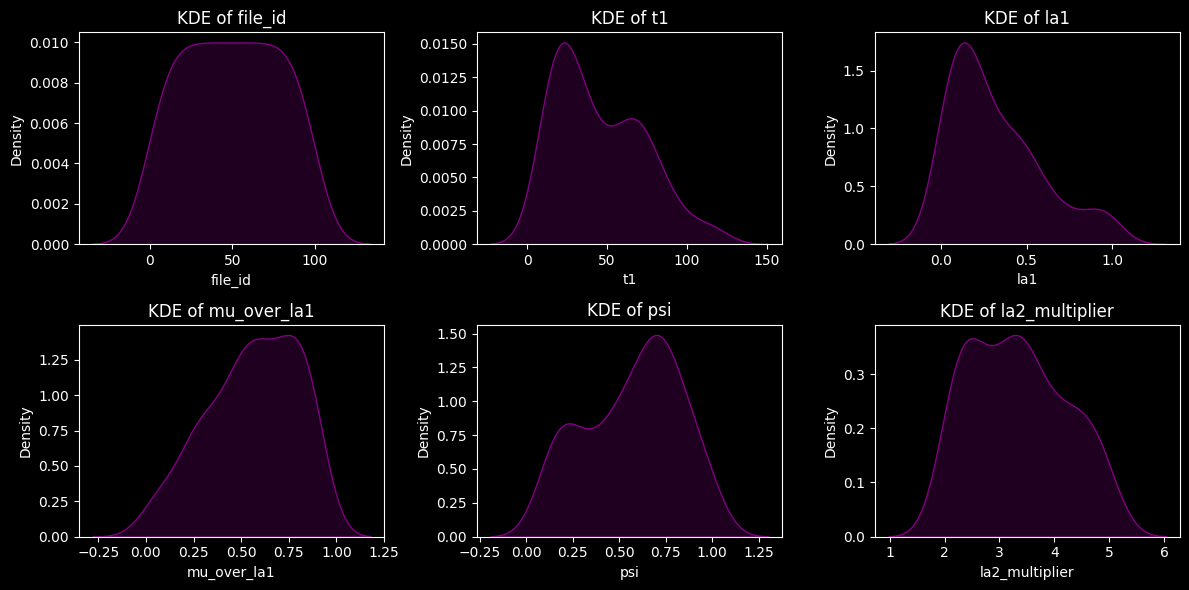

In [11]:
plot_kde(trees,num_cols)